In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 686kB 41.8MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution()

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt\Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples', num_train_examples)
print('Number of test examples', num_test_examples)

Number of training examples 60000
Number of test examples 10000


In [ ]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255.0
  return images,labels

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

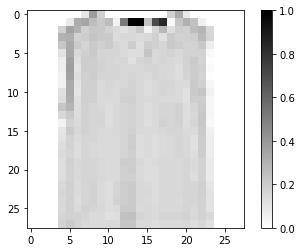

In [ ]:
for image,label in train_data.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

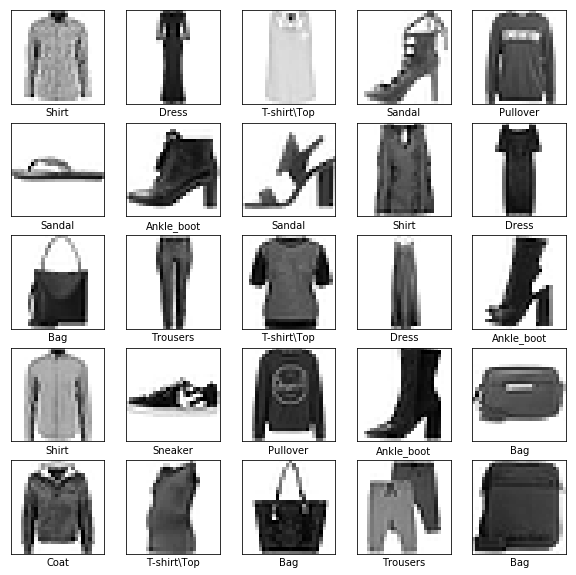

In [ ]:
plt.figure(figsize=(10,10))
i=0
for image,label in test_data.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_data = train_data.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [ ]:
model.fit(train_data, epochs=5, steps_per_epoch=(num_train_examples//BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4872 - acc: 0.8302
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3726 - acc: 0.8658
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3298 - acc: 0.8795
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3093 - acc: 0.8865
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2918 - acc: 0.8912


In [ ]:
test, test_accuracy = model.evaluate(test_data)#, steps=(num_test_examples//BATCH_SIZE))


    313/Unknown - 3s 9ms/step - loss: 0.3539 - acc: 0.8736

In [ ]:
for test_images, test_labels in test_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([5.9880686e-06, 1.3822671e-07, 9.1128424e-03, 8.2909810e-06,
       8.2388155e-02, 7.8757395e-08, 9.0847546e-01, 1.6922165e-11,
       8.9342602e-06, 5.1771845e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

6

In [ ]:
test_labels[0]

6

In [ ]:
def plot_images(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap = plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_labels], color = color))
  
  
def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('blue')

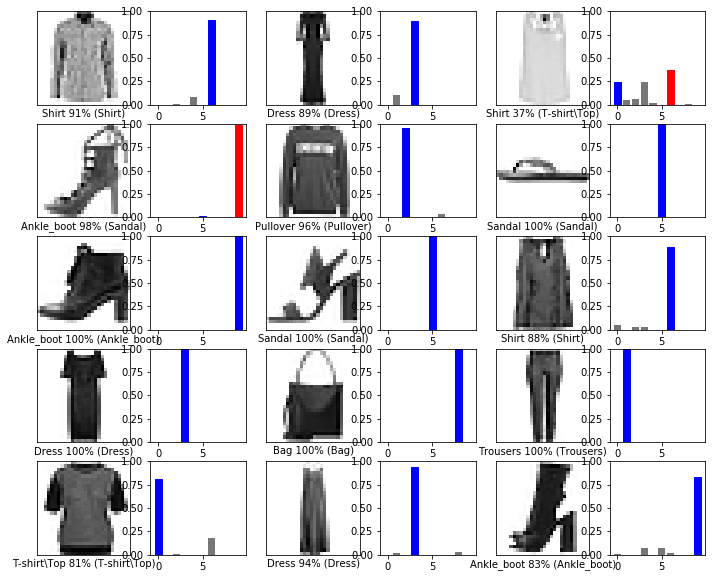

In [ ]:
num_cols = 3
num_rows = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(15):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])
img.shape

(1, 28, 28, 1)

In [ ]:
predict_single = model.predict(img)
predict_single

array([[5.9880740e-06, 1.3822671e-07, 9.1128508e-03, 8.2909883e-06,
        8.2388185e-02, 7.8757544e-08, 9.0847546e-01, 1.6922196e-11,
        8.9342529e-06, 5.1771845e-09]], dtype=float32)

([<matplotlib.axis.XTick at 0x7fc651f3a978>,
 <a list of 10 Text xticklabel objects>)

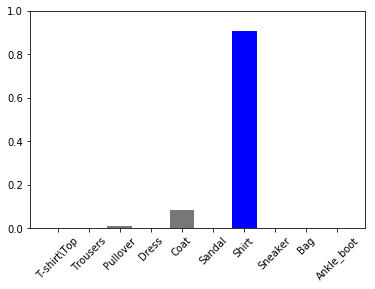

In [ ]:
plot_value_array(0, predict_single, test_labels)
plt.xticks(range(10),class_names, rotation=45)